In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    
    edges = cv2.Canny(blurred, 30, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bandeiras = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)  
        if w > 30 and h > 20:  
            roi = img[y:y+h, x:x+w]  
            pais = classifica_bandeira(roi)  
            bandeiras.append((pais, (x, y), (x + w, y + h)))

    return bandeiras

def classifica_bandeira(roi):
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    
    cor_sup_esq = hsv[5, 5]  
    cor_inf_esq = hsv[-5, 5]  

    if cor_sup_esq[0] < 10 and cor_inf_esq[0] < 10:  
        return "peru"
    elif cor_sup_esq[0] < 10 and cor_inf_esq[0] > 100:  
        return "singapura"
    elif cor_sup_esq[0] > 100 and cor_inf_esq[0] < 10:  
        return "monaco"
    elif 20 < cor_sup_esq[0] < 40 and 20 < cor_inf_esq[0] < 40:  
        return "irlanda"
    elif 40 < cor_sup_esq[0] < 60 and 40 < cor_inf_esq[0] < 60:  
        return "italia"

In [26]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('peru', (192, 584), (457, 674)), (None, (216, 507), (259, 575)), (None, (192, 496), (457, 583)), ('peru', (726, 265), (985, 370)), (None, (726, 162), (984, 264)), (None, (295, 121), (381, 296)), ('peru', (205, 121), (294, 296)), (None, (118, 121), (204, 296))]


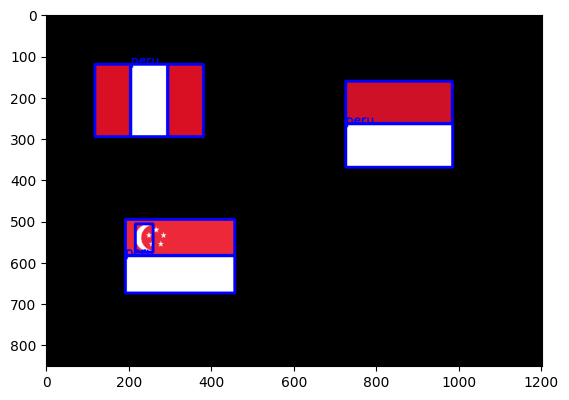

In [29]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


